In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
sns.color_palette("magma")
from scipy import stats

In [2]:
df = pd.read_csv("data.csv")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
df = df.drop(labels = ["name","id","release_date"],axis = 1)
df['artists'] = df['artists'].apply(lambda x: x[1:-1].replace("'", ''))

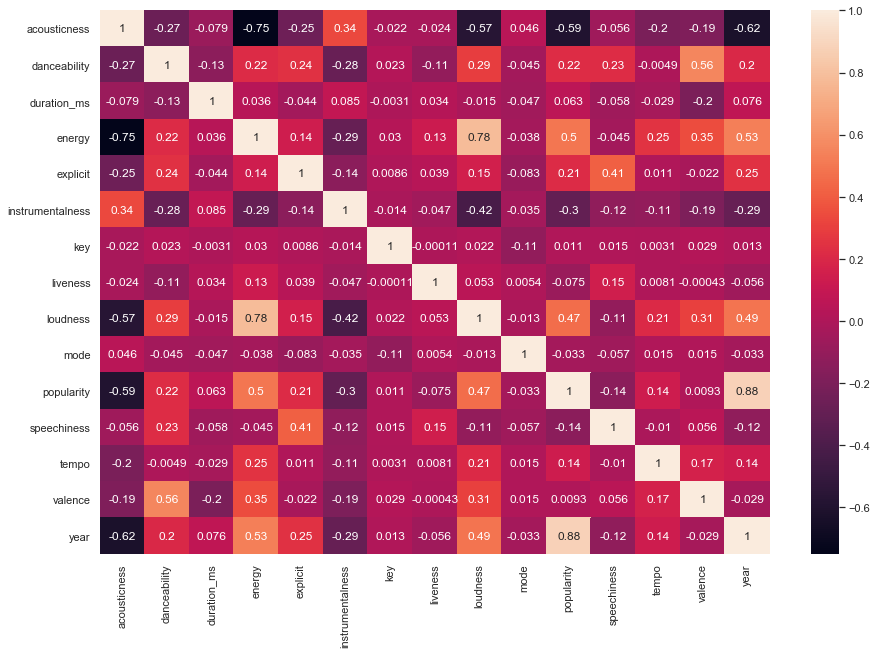

In [4]:
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c, annot=True)

from scipy import stats

def outlier_removal(df):
    # integer or float columns
    int_col=['acousticness','danceability','explicit','duration_ms','energy','instrumentalness','liveness','loudness','mode','popularity','speechiness','tempo','valence','year','key']

    # df of only numeric columns
    int_df = df[int_col].copy()

    # remove outliers which using z score with threshold 3

    # some songs have explicit as 1 and should not be considered as outliers
    int_df = int_df.drop(['explicit'],axis = 1)

    z = np.abs(stats.zscore(int_df))
    threshold = 3
    print(np.shape(np.where(z > 3)))


    new_df = int_df[(z < 3).all(axis=1)]

    print("Dataframe of integer columns except explicit before removal of outliers", int_df.shape)
    print("Dataframe of integer columns except explicit after removal of outliers", new_df.shape)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(new_df)
    new_df = scaler.transform(new_df)

    new_df = pd.DataFrame(df, columns = int_df.columns)

    return new_df

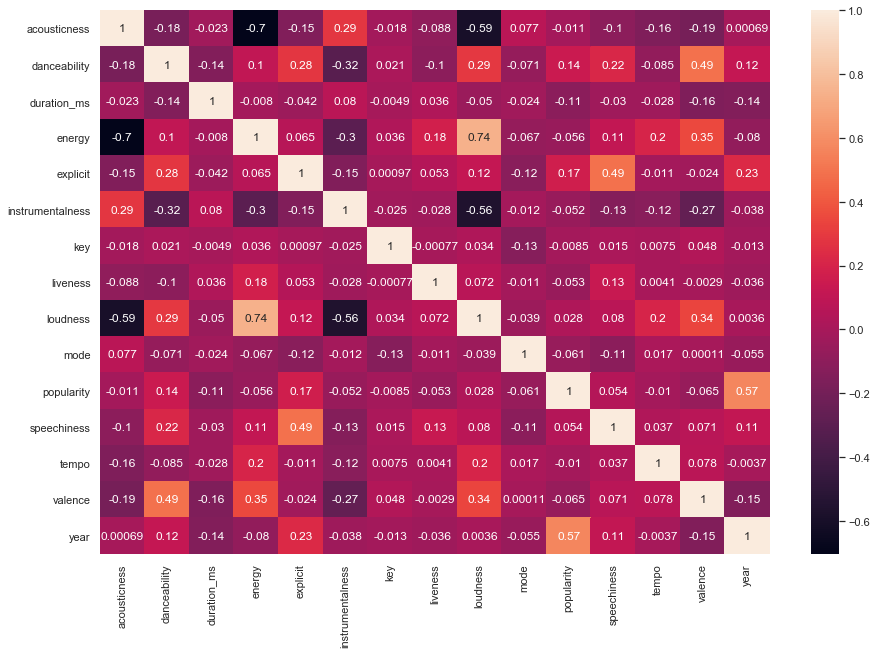

In [5]:
century21 = df[df['year'] >= 2000]
plt.figure(figsize=(15,10))
c= century21.corr()
sns.heatmap(c, annot=True)

In [6]:
[century21[century21['explicit'] == 1].count()/century21.count()][0][0]

0.22589782984444018

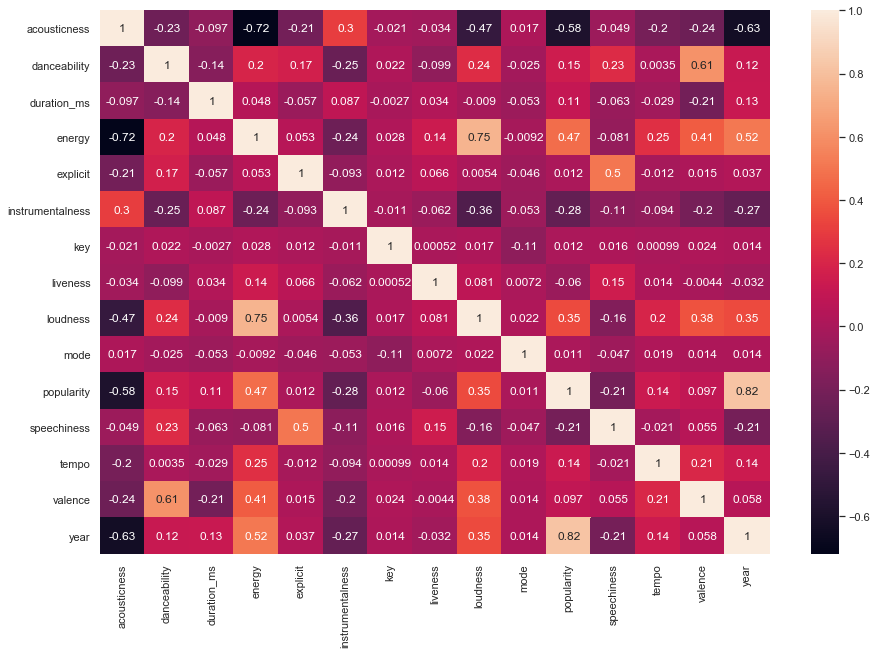

In [7]:
century20 = df[df['year'] < 2000]
plt.figure(figsize=(15,10))
c= century20.corr()
sns.heatmap(c, annot=True)

In [8]:
[century20[century20['explicit'] == 1].count()/century20.count()][0][0]

0.03905561663274933

In [ ]:
"""
We can see the difference between explicit songs which clearly defines the difference in listening over the different centuries.
We may further see this for different features and also an increase in explicit songs in the 21st century.
This can be observed in the individual generations of change also.
Also, the popularity increases over the 20th century and goes a bit more less correlated in the 21st century.
This happens due to the gaining popularity of streaming services and the music inclined generation we have built today.
Now, let's see how the popularity is gained for individual artists over the time period.
"""

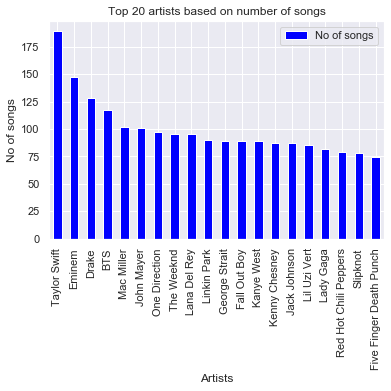

In [9]:
top20artists = pd.DataFrame({'No of songs':century21['artists'].value_counts().head(20)})
top20artists.plot.bar(color='blue')
plt.title('Top 20 artists based on number of songs')
plt.xlabel('Artists')
plt.ylabel('No of songs')
plt.show()

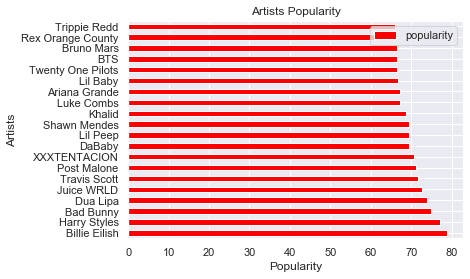

In [10]:
minartists = century21.groupby(['artists']).filter(lambda x: len(x) > 20)
artists_grp = minartists.groupby(['artists'])
Top20artists = artists_grp[['popularity']].mean().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='red')
plt.title('Artists Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

In [11]:
df = outlier_removal(df)
century20 = outlier_removal(century20)
century21 = outlier_removal(century21)

(2, 13677)
Dataframe of integer columns except explicit before removal of outliers (169909, 14)
Dataframe of integer columns except explicit after removal of outliers (157218, 14)
(2, 11261)
Dataframe of integer columns except explicit before removal of outliers (128253, 14)
Dataframe of integer columns except explicit after removal of outliers (117703, 14)
(2, 5982)
Dataframe of integer columns except explicit before removal of outliers (41656, 14)
Dataframe of integer columns except explicit after removal of outliers (36987, 14)


In [12]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,key
0,0.995,0.708,158648,0.1950,0.563,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928,10
1,0.994,0.379,282133,0.0135,0.901,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928,8
2,0.604,0.749,104300,0.2200,0.000,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928,5
3,0.995,0.781,180760,0.1300,0.887,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928,1
4,0.990,0.210,687733,0.2040,0.908,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928,11


In [13]:
from sklearn import metrics
def error_metrics(y_test,y_pred):
    print('Mean Absolute Error:', metrics.r2_score(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [14]:
from sklearn.model_selection import train_test_split
training_data_total = century20.sample(1000)
y = training_data_total['popularity']
X = training_data_total.drop(['popularity'],axis = 1)
# split into train test sets
X1_train, X_test, y1_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn import tree
dt_20century = tree.DecisionTreeRegressor()
dt_20century = dt_20century.fit(X1_train,y1_train)

from sklearn.model_selection import train_test_split
testing_data = century21.sample(1000)
y = testing_data['popularity']
X = testing_data.drop(['popularity'],axis = 1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

test_results = dt_20century.predict(X_test)
test_results = [int(i) for i in test_results]

error_metrics(y_test,test_results)
import math
sse = ((test_results - y_test)**2).mean()

math.sqrt(abs(sse))

(800, 13) (200, 13) (800,) (200,)
Mean Absolute Error: -1.4985944782160092
Mean Squared Error: 312.875
Root Mean Squared Error: 17.68827295130873


17.68827295130873

In [16]:
from sklearn import tree
dt_21century = tree.DecisionTreeRegressor()
dt_21century = dt_21century.fit(X_train,y_train)

test_results = dt_21century.predict(X_test)
test_results = [int(i) for i in test_results]

error_metrics(y_test,test_results)

sse = ((test_results - y_test)**2).mean()

math.sqrt(abs(sse))

Mean Absolute Error: -0.5215172607658176
Mean Squared Error: 190.525
Root Mean Squared Error: 13.80307936657614


13.80307936657614

In [17]:
#Comparison models - Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)

test_results = lr.predict(X_test)

error_metrics(y_test,test_results)

sse = ((test_results - y_test)^2).mean()
math.sqrt(abs(sse))

Mean Absolute Error: -0.15807807673510066
Mean Squared Error: 145.015
Root Mean Squared Error: 12.042217403784072


2.115419580130618

In [18]:
# SVM - Comparison model
from sklearn import svm
clf = svm.SVR(kernel = "sigmoid")
clf = clf.fit(X_train,y_train)

test_results = clf.predict(X_test)
test_results = [int(i) for i in test_results]

error_metrics(y_test,test_results)

sse = ((test_results - y_test)^2).mean()
math.sqrt(abs(sse))

Mean Absolute Error: -0.0638043002577855
Mean Squared Error: 133.21
Root Mean Squared Error: 11.541663658242689


0.8831760866327847

In [19]:
def gen_latest(num1,num2):
  df_1 = df[df['year'] >= num1]
  return df_1[df_1['year'] <= num2]

def split_data_df(df1):
  testing_data = df1.sample(1000)
  y = testing_data['popularity']
  X = testing_data.drop(['popularity'],axis = 1)
  return X,y

def test_result(dt,X_test,y_test):
  test_results = dt.predict(X_test)
  test_results = [int(i) for i in test_results]
  error_metrics(y_test,test_results)
  sse = ((test_results - y_test)^2).mean()
  print(math.sqrt(abs(sse))) 


In [20]:
inc = 5
for i in range(2000,2019,inc):
  df1 = gen_latest(i,i+inc)
  X_test,y_test = split_data_df(df1)
  print(f"Error from dt of whole data for popularity of songs between year {i} and {i+inc}")
  test_result(dt_20century,X_test,y_test)
  print(f"Error from dt of only 21st century data for popularity of songs above year {i}")
  test_result(dt_21century,X_test,y_test)

Error from dt of whole data for popularity of songs between year 2000 and 2005
Mean Absolute Error: -1.1288415507607397
Mean Squared Error: 155.223
Root Mean Squared Error: 12.458852274587736
2.4704250646396866
Error from dt of only 21st century data for popularity of songs above year 2000
Mean Absolute Error: -0.9457224744269657
Mean Squared Error: 141.871
Root Mean Squared Error: 11.910961338196007
0.9386160024205852
Error from dt of whole data for popularity of songs between year 2005 and 2010
Mean Absolute Error: -2.0914712861326876
Mean Squared Error: 194.999
Root Mean Squared Error: 13.964204237979335
2.937856361362822
Error from dt of only 21st century data for popularity of songs above year 2005
Mean Absolute Error: -1.0285387385296119
Mean Squared Error: 127.953
Root Mean Squared Error: 11.31163118210632
0.8142481194328913
Error from dt of whole data for popularity of songs between year 2010 and 2015
Mean Absolute Error: -4.004200117313034
Mean Squared Error: 293.786
Root Mean